# Multi-armed bandit problem

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt

from multi_armed_bandit import (
    TestBed, GreedyAgent, EpsilonGreedyAgent, UCBAgent, Simulation)

Simulation running: 100%|██████████| 100/100 [00:14<00:00,  6.70it/s]


<IPython.core.display.Javascript object>


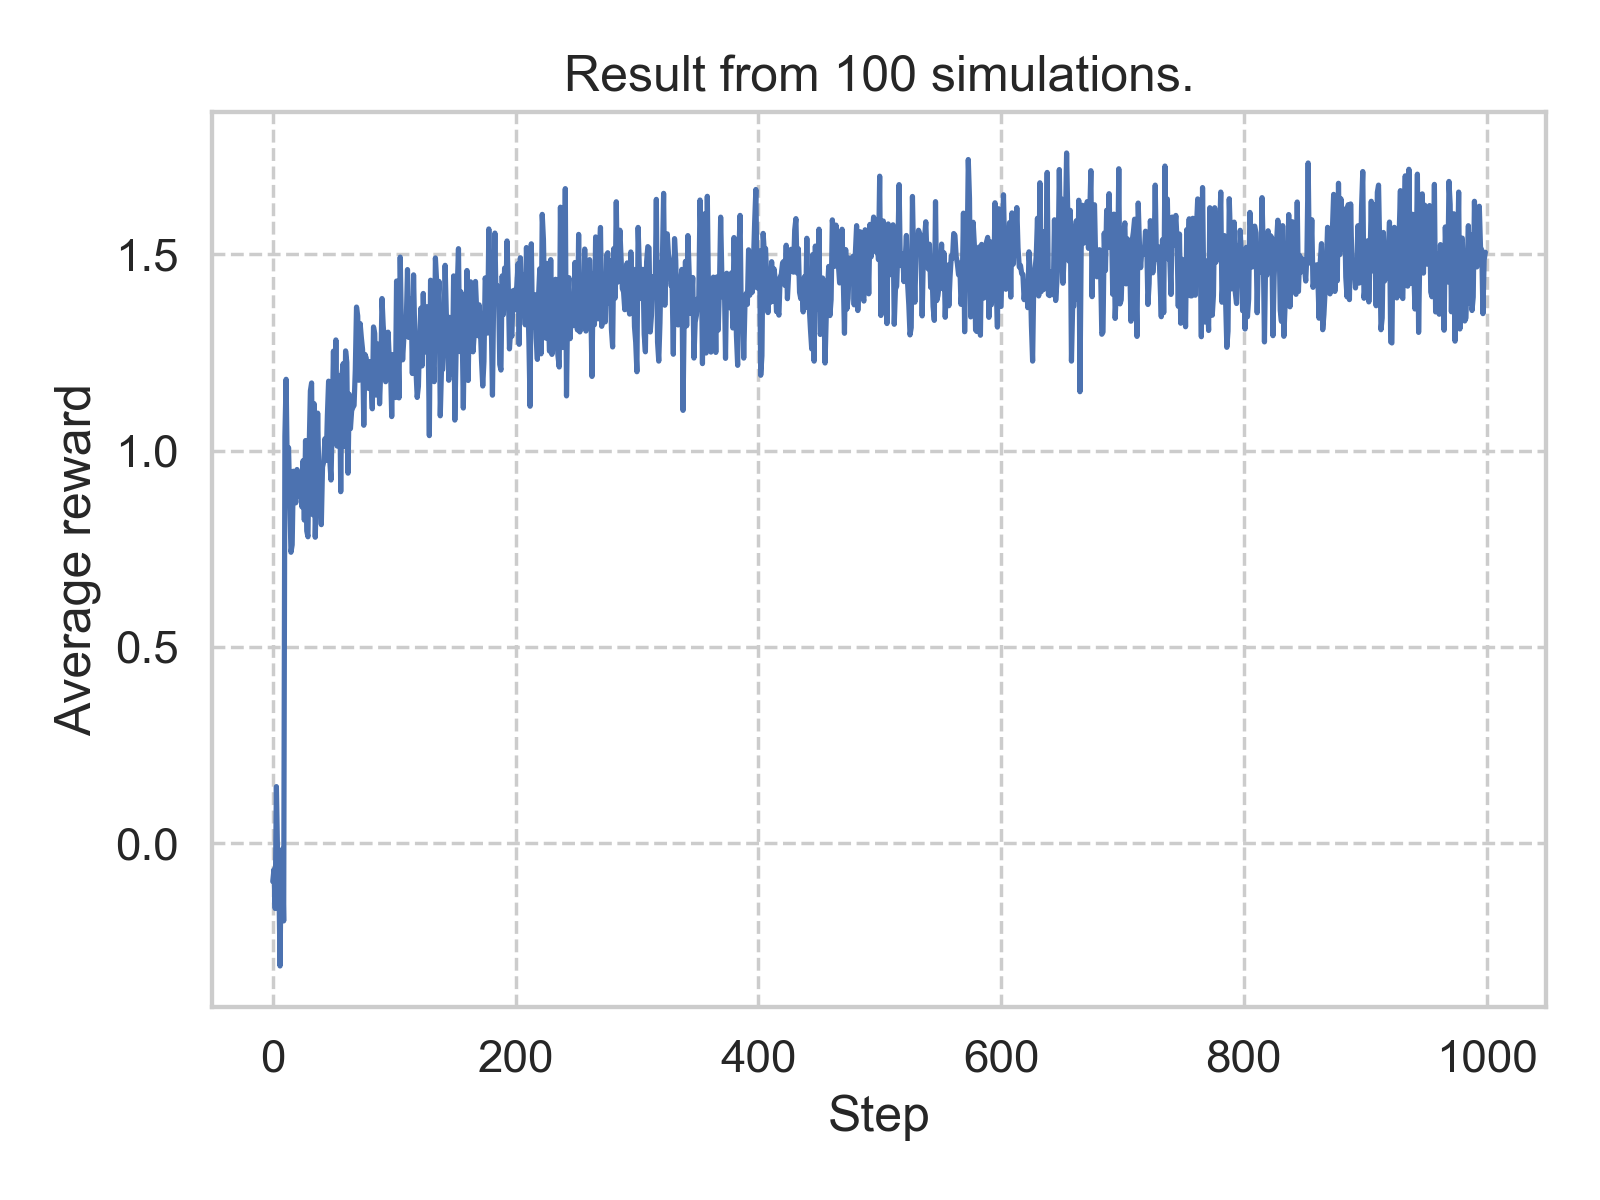

In [26]:
simulation = Simulation(
    env_type=TestBed,
    agent_type=UCBAgent,
    num_agents=100,
    init_value=None,
    step=1000,
    env_kwargs={'num_arms': 10},
    agent_kwargs={'c': 2}
)

simulation.run_all_agents()
_ = simulation.aggregate_rewards()